In [2]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import math
import matplotlib.pyplot as plt
import joblib
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.utils import shuffle

from datetime import datetime
from datetime import timedelta

In [3]:
data = pd.read_csv(r'C:\Users\Giacomo\Desktop\polimi\tesi\SIEMENS\Dataturbine1ok.csv')
data['MeasuringTime'] = pd.to_datetime(data['MeasuringTime'], format= str(['%Y-%m-%d %H:%M:%S'])) #turbine1
#data['MeasuringTime'] = pd.to_datetime(data2['MeasuringTime'], format= str(['%d/%m/%Y %H:%M'])) #turbine2,3,4
data = data.drop('Unnamed: 0', axis = 'columns')
data = data.set_index('MeasuringTime');# set MeasuringTime as index
data.head(2)

,actpower_mean,actpower_SD,acwindsp_mean,acwindsp_SD,winavail_mean,PitcPos_SD,ambietmp_mean,ambietmp_SD,winavail_SD,PitcPos_mean,NacelPos_mean,NacelPos_SD,turbinok,wtoperst
MeasuringTime,,,,,,,,,,,,,,
2018-01-01 00:00:00,886.126630,484.696104,7.091023,1.590976,6.914570,0.816856,6.209388,0.147205,1.116815,-1.619397,336.900472,3.229169,1.0,0.0
2018-01-01 00:10:00,2544.636668,415.082365,10.608348,1.598455,10.351733,2.065005,5.619920,0.059893,0.993524,0.054668,342.943567,3.948880,1.0,0.0


In [4]:
target = 'actpower_mean'

In [5]:
X = data.drop([target], axis = 'columns')
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [57]:
model = RandomForestRegressor(n_estimators = 10,random_state=10, max_depth = 4)

In [58]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[
                              ('model', model)
                             ])

In [59]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds_test = my_pipeline.predict(X_test)
preds_train = my_pipeline.predict(X_train)

# Evaluate the model
score_test = mean_absolute_error(y_test, preds_test)
score_train = mean_absolute_error(y_train, preds_train)
print('MAE validation:', score_test)
print('MAE train:', score_train)
    
    

MAE validation: 67.30269583433704
MAE train: 66.9646256658212


In [60]:
filename = './Example.joblib'
_ = joblib.dump(model, filename, compress=9)

In [61]:
tunedModel = joblib.load('./Example.joblib') 

Text(0.5, 1.0, 'Real vs Predicted')

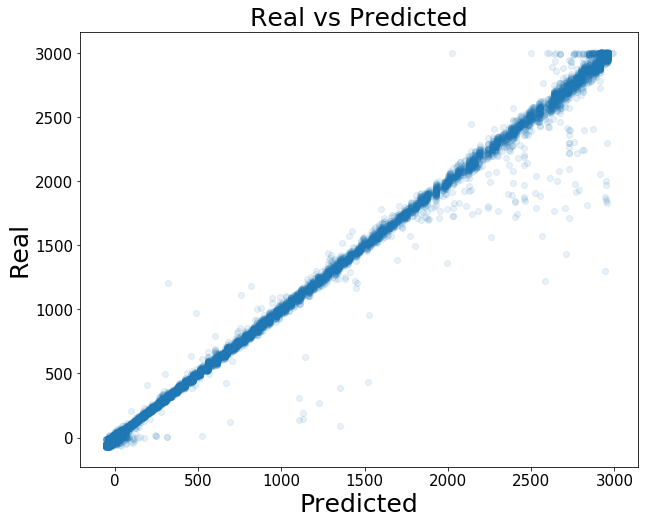

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(preds_test, y_test, alpha = 0.1)
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Real', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Real vs Predicted', fontsize = 25)

,actpower_mean,actpower_SD,acwindsp_mean,acwindsp_SD,winavail_mean,PitcPos_SD,ambietmp_mean,ambietmp_SD,winavail_SD,PitcPos_mean,NacelPos_mean,NacelPos_SD,turbinok,wtoperst
MeasuringTime,,,,,,,,,,,,,,
2018-01-01 00:00:00,1485.843682,1082.359116,8.406123,3.092946,8.383179,3.293807,5.662323,0.297089,2.757086,0.214500,258.959837,6.157459,1.0,0.0
2018-01-01 00:10:00,2237.560037,527.682992,9.693807,1.869755,9.740189,2.127322,5.179425,0.177278,1.211169,-0.783027,261.029221,3.279129,1.0,0.0


MAE: 38.23485804906932


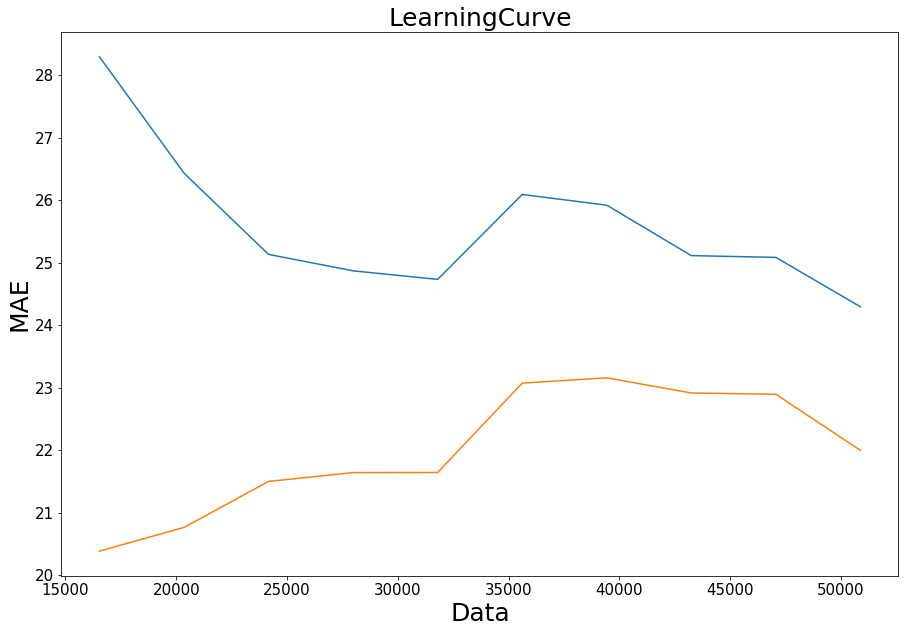

In [26]:
#learning curve
n = 10
test = []
train = []
k = 1
lt = math.ceil(len(X_train)/n)
    
for m in range(n):
    i = lt*k
        
    # Preprocessing of training data, fit model 
    my_pipeline.fit(X_train[0:i], y_train[0:i])

    # Preprocessing of validation data, get predictions
    preds_test = my_pipeline.predict(X_test)
    preds_train = my_pipeline.predict(X_train[0:i])

    # Evaluate the model
    test.append(mean_absolute_error(y_test, preds_test))
    train.append(mean_absolute_error(y_train[0:i], preds_train))
    k = k+1
        
    #print(test)
    #print(train)
x = np.arange(lt+len(X_test),len(X_train)+len(X_test)+lt,lt)
plt.figure(figsize = (15,10))
plt.plot(x,test)
plt.plot(x,train)
plt.xlabel('Data', fontsize = 25)
plt.ylabel('MAE', fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('LearningCurve', fontsize = 25)
plt.show()
    

In [91]:
#learning curve
n = 10
score = []
k = 1
lt = math.ceil(len(X_train)/n)
    
for m in range(n):
    i = lt*k
        
   
    
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X[0:i], y[0:i],
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    score.append(scores)

    print("MAE scores:\n", scores, 'the mean is :', score)
    k = k+1
        
    #print(test)
    #print(train)


MAE scores:
 [43.17829236 48.90736179 39.38254071 43.99873305 44.27704971] the mean is : [array([43.17829236, 48.90736179, 39.38254071, 43.99873305, 44.27704971])]
MAE scores:
 [44.5258192  41.3727247  41.97868244 45.26565659 44.30191025] the mean is : [array([43.17829236, 48.90736179, 39.38254071, 43.99873305, 44.27704971]), array([44.5258192 , 41.3727247 , 41.97868244, 45.26565659, 44.30191025])]
MAE scores:
 [52.05253752 48.63411477 44.56806797 55.1878383  52.81269105] the mean is : [array([43.17829236, 48.90736179, 39.38254071, 43.99873305, 44.27704971]), array([44.5258192 , 41.3727247 , 41.97868244, 45.26565659, 44.30191025]), array([52.05253752, 48.63411477, 44.56806797, 55.1878383 , 52.81269105])]
MAE scores:
 [54.98188347 51.21082527 53.23373118 46.72863412 47.77737334] the mean is : [array([43.17829236, 48.90736179, 39.38254071, 43.99873305, 44.27704971]), array([44.5258192 , 41.3727247 , 41.97868244, 45.26565659, 44.30191025]), array([52.05253752, 48.63411477, 44.56806797, 55

[[  68.62166443  125.07964797   24.44624343 1099.86642871   43.07770752
    25.17296726   24.28945139   25.19990172   99.34600258   24.49695961
    24.37729587   24.2944236    24.37117336]
 [  69.85339908  125.45999188   22.37121422 1102.45013876   40.55732255
    23.41039765   22.01819486   22.99657131  102.07055357   22.55970108
    22.07218539   21.99779456   22.05013247]]


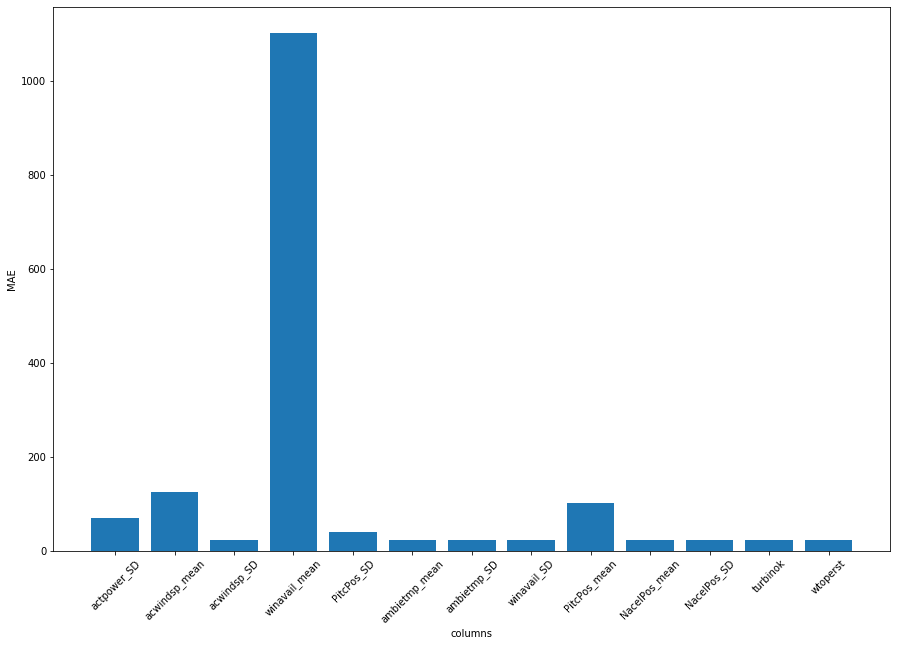

In [25]:
#feature selection
#cp = cp.drop(['winavail_mean'],axis = 1)
#print(cp.head(1))
A = np.arange(0, len(X.columns), 1)

mae = np.zeros((2,len(A)))
for i in A:
    cp = X.copy()
    #X = cp.copy()
    B = shuffle(cp.iloc[:,i].copy())
    cp.iloc[:,i] = list(B)
        
    X_t, X_cv, y_t, y_cv = train_test_split(cp, y, random_state=10)
        

    Xgb = tunedModel
    

    y_predict_cv = Xgb.predict(X_cv)
    y_predict_t = Xgb.predict(X_t)
    mae[0,i] = mean_absolute_error(y_cv, y_predict_cv)
    mae[1,i] = mean_absolute_error(y_t, y_predict_t)
        

        
print(mae)
plt.figure(figsize = (15,10))
plt.bar(list(cp.columns),mae[1,:])
plt.xlabel('columns')
plt.ylabel('MAE')
plt.xticks(rotation = 45)
plt.show()
    
    

In [65]:
#cv
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores, 'the mean is :', np.mean(scores))

MAE scores:
 [ 96.59356621  52.17896489  41.6766195   66.5210281  104.45186049] the mean is : 72.28440783770682


In [76]:
#select another turbine
data1 = pd.read_csv(r'C:\Users\Giacomo\Desktop\polimi\tesi\SIEMENS\Dataturbine2ok.csv')#2 and 3
#data1 = pd.read_csv(r'C:\Users\Giacomo\Desktop\polimi\tesi\SIEMENS\Dataturbine4ok.csv')
data1['MeasuringTime'] = pd.to_datetime(data1['MeasuringTime'], format= str(['%d/%m/%Y %H:%M'])) #turbine2,3,4
data1 = data1.drop('Unnamed: 0', axis = 'columns')
data1 = data1.set_index('MeasuringTime');# set MeasuringTime as index
data1.head(2)

,actpower_mean,actpower_SD,acwindsp_mean,acwindsp_SD,winavail_mean,PitcPos_SD,ambietmp_mean,ambietmp_SD,winavail_SD,PitcPos_mean,NacelPos_mean,NacelPos_SD,turbinok,wtoperst
MeasuringTime,,,,,,,,,,,,,,
2018-01-01 00:00:00,1028.915425,824.497609,7.011061,2.126572,7.085557,1.221476,7.378922,0.456440,1.844658,-1.377476,250.081598,2.864771,1.0,0.0
2018-01-01 00:10:00,2449.912585,399.089634,10.338112,1.531714,10.110209,1.793798,6.493402,0.672735,0.898947,-0.568549,255.046541,1.955936,1.0,0.0


In [77]:
#use your model on other turbine data

X1 = data1.drop([target], axis = 'columns')
y1 = data1[target]
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 10)

Xgb = tunedModel
    
y_predict = Xgb.predict(X1)


# Evaluate the model
score = mean_absolute_error(y1, y_predict)


print('MAE:', score)


MAE: 67.89907069109282


In [81]:
# create a dataframe with all the results
res = pd.DataFrame()
res['wind_speed'] = data.winavail_mean
res['power_mean'] = data.actpower_mean

ValueError: Length of values does not match length of index

In [83]:
res

,wind_speed,power_mean
MeasuringTime,,
2018-01-01 00:00:00,6.914570,886.126630
2018-01-01 00:10:00,10.351733,2544.636668
2018-01-01 00:20:00,10.196003,2502.016482
2018-01-01 00:30:00,14.060670,2966.599595
2018-01-01 00:40:00,11.544665,2893.676365
...,...,...
2018-12-31 23:10:00,8.399902,1552.297365
2018-12-31 23:20:00,8.855333,1787.633827
2018-12-31 23:30:00,8.500631,1587.731215
